In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import os
import sys
from scipy.stats import norm
from sklearn import preprocessing

debug = False

In [2]:
def normalize(x):
    mean = np.mean(x)
    std = np.std(x)
    
    X = x-mean
    X=X/std
    
    return X

In [3]:
def find_hypothesis(X,theta):
    return np.dot(X,theta)

def find_J_theta(X,Y,theta):
    hypothesis = find_hypothesis(X,theta)
    difference =  Y - hypothesis
    sum_sq = np.dot(difference.transpose(),difference)
    return sum_sq[0,0]/(2*X.shape[0])

def gradient(X,Y,theta):
    term1 = np.dot(X.transpose(),X)
    term2 = np.dot(term1,theta)
    term3 = np.dot(X.transpose(),Y)
    return(term2-term3)

def SGD(X,Y, learning_rate=0.001, error_threshold = 0.0000001):
    
    # theta shape is number of unknown parameters * 1 (2*1)
    theta = np.zeros((X.shape[1],1)) 
    
    list_error = []
    list_theta = []
    
    list_theta.append(theta)
    
    # Finding the error
    J_theta = find_J_theta(X,Y,theta)
    list_error.append(J_theta)
    
    epoch = 0
    while(True):
        epoch+=1
        theta = theta - learning_rate * gradient(X, Y, theta)
        J_theta_new = find_J_theta(X,Y,theta)
            
        list_error.append(J_theta_new)
        list_theta.append(theta)
        
        if(abs(J_theta_new-J_theta)<error_threshold or epoch>10000):
            return theta,list_error, list_theta,epoch
        J_theta = J_theta_new.copy()



In [4]:
X = genfromtxt('data/q1/linearX.csv', delimiter=',')
Y = genfromtxt('data/q1/linearY.csv',delimiter=',')

X_normal = normalize(X)
Y_normal = Y.copy()

if(debug):
    print(X)
    print(X_normal)
    
    print(Y)
    print(Y_normal)

X_normal=X_normal.reshape(-1,1)
Y_normal=Y_normal.reshape(-1,1)


# Adding the intercept
X_normal=np.hstack((X_normal,np.ones((X_normal.shape[0],1))))

Stoping criteria : abs cost difference < error_threshold or epoch>10000
Learning rate : 1e-05
Number of epochs : 4601
Final Theta :
 [[0.00132677]
 [0.98663526]]
Learning rate : 0.0001
Number of epochs : 574
Final Theta :
 [[0.00133601]
 [0.99350744]]
Learning rate : 0.001
Number of epochs : 67
Final Theta :
 [[0.00133904]
 [0.9957635 ]]
Learning rate : 0.01
Number of epochs : 2
Final Theta :
 [[0.0013402]
 [0.9966201]]


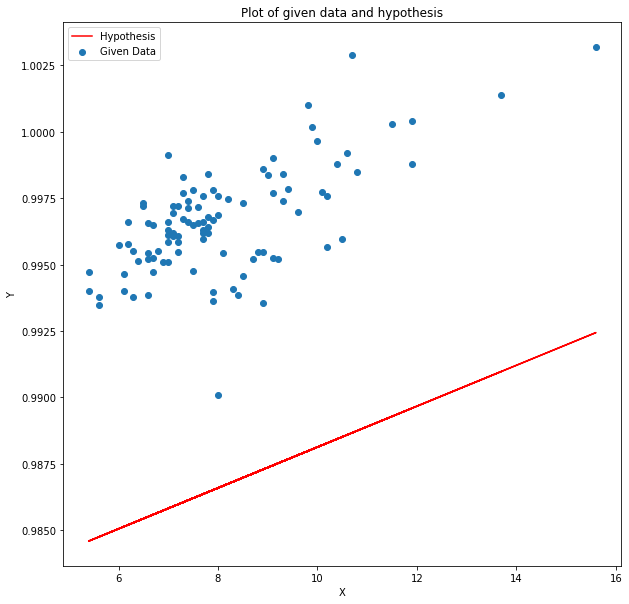

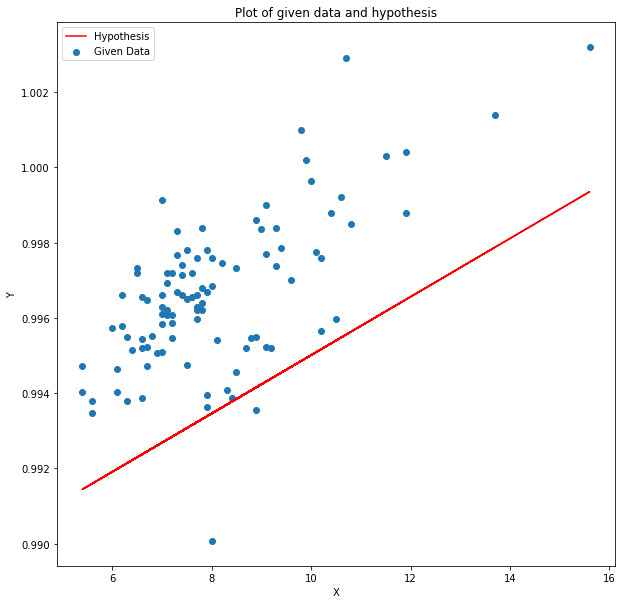

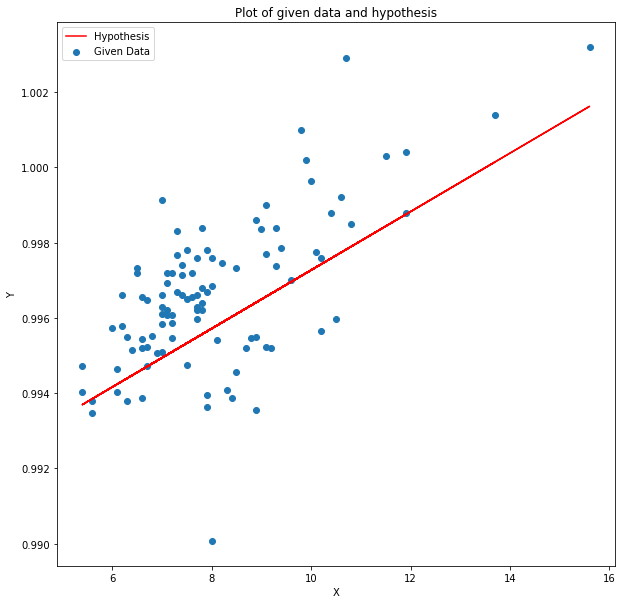

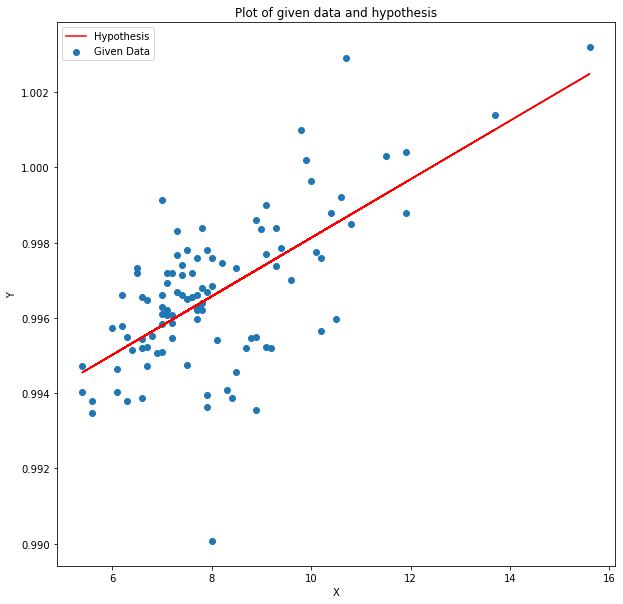

In [6]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01]

print("Stoping criteria : abs cost difference < 0.0000001 or epoch>10000")

for learning_rate in learning_rates:
    theta, lst_error,lst_theta,epoch = SGD(X_normal, Y_normal,learning_rate = learning_rate )
    print("Learning rate :",learning_rate)
    print("Number of epochs :",epoch)
    print("Final Theta :\n",theta)
    
    # plotting
    plt.figure(figsize=(10,10))
    plt.scatter(X, Y,label = 'Given Data')

    Y_p = []
    for x in X_normal:
        Y_p.append(find_hypothesis(x, theta)[0])

    plt.plot(X, Y_p, '-r',label = 'Hypothesis')
    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Plot of given data and hypothesis")
    plt.savefig('output/Ques1(b)_'+str(learning_rate)+'.png')